In [ ]:
import tensorflow as tf

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving housePrice data.csv to housePrice data (2).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['housePrice data.csv']), header = None)
df.columns = ['change']

In [ ]:
df1 = df.change.apply(lambda x: pd.Series(str(x).split()))
df1.columns = ['crim','zn','indus','riverside','nox','rm','age','dis','rad','tax','ptratio','black','Istat','medv']

In [ ]:
df1.head()

,crim,zn,indus,riverside,nox,rm,age,dis,rad,tax,ptratio,black,Istat,medv
0,0.04337,21.00,5.640,0,0.4390,6.1150,63.00,6.8147,4,243.0,16.80,393.97,9.43,20.50
1,0.05360,21.00,5.640,0,0.4390,6.5110,21.10,6.8147,4,243.0,16.80,396.90,5.28,25.00
2,0.04981,21.00,5.640,0,0.4390,5.9980,21.40,6.8147,4,243.0,16.80,396.90,8.43,23.40
3,0.01360,75.00,4.000,0,0.4100,5.8880,47.60,7.3197,3,469.0,21.10,396.90,14.80,18.90
4,0.01311,90.00,1.220,0,0.4030,7.2490,21.90,8.6966,5,226.0,17.90,395.93,4.81,35.40


In [ ]:
df1.describe(include='all')

,crim,zn,indus,riverside,nox,rm,age,dis,rad,tax,ptratio,black,Istat,medv
count,506,506,506,506,506,506,506,506,506,506,506,506,506,506
unique,504,26,76,2,81,446,356,412,9,66,46,357,455,229
top,0.01501,0.00,18.100,0,0.5380,5.7130,100.00,3.4952,24,666.0,20.20,396.90,14.10,50.00
freq,2,372,132,471,23,3,43,5,132,132,140,121,3,16


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([('standardize', StandardScaler(), ['crim', 'zn', 'indus','nox','rm','age','dis','rad','tax','ptratio','black','Istat'])], remainder='passthrough')

In [ ]:
df1.columns

Index(['crim', 'zn', 'indus', 'riverside', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'Istat', 'medv'],
      dtype='object')

In [ ]:
import numpy as np
X = np.asarray(df1[['crim', 'zn', 'indus', 'riverside', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'Istat']])
y = np.asarray(df1[['medv']])

In [ ]:
X[0:5]

array([['0.04337', '21.00', '5.640', '0', '0.4390', '6.1150', '63.00',
        '6.8147', '4', '243.0', '16.80', '393.97', '9.43'],
       ['0.05360', '21.00', '5.640', '0', '0.4390', '6.5110', '21.10',
        '6.8147', '4', '243.0', '16.80', '396.90', '5.28'],
       ['0.04981', '21.00', '5.640', '0', '0.4390', '5.9980', '21.40',
        '6.8147', '4', '243.0', '16.80', '396.90', '8.43'],
       ['0.01360', '75.00', '4.000', '0', '0.4100', '5.8880', '47.60',
        '7.3197', '3', '469.0', '21.10', '396.90', '14.80'],
       ['0.01311', '90.00', '1.220', '0', '0.4030', '7.2490', '21.90',
        '8.6966', '5', '226.0', '17.90', '395.93', '4.81']], dtype=object)

In [ ]:
y[0:5]

array([['20.50'],
       ['25.00'],
       ['23.40'],
       ['18.90'],
       ['35.40']], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 1234)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [ ]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
X_train_df.columns = ['crim', 'zn', 'indus', 'riverside', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'Istat']
X_test_df.columns = ['crim', 'zn', 'indus', 'riverside', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'Istat']

In [ ]:
X_train_scale = ct.fit_transform(X_train_df)
X_test_scale = ct.fit_transform(X_test_df)

In [ ]:
X_train_df.head()

,crim,zn,indus,riverside,nox,rm,age,dis,rad,tax,ptratio,black,Istat
0,0.10612,30.00,4.930,0,0.4280,6.0950,65.10,6.3361,6,300.0,16.60,394.62,12.40
1,3.47428,0.00,18.100,1,0.7180,8.7800,82.90,1.9047,24,666.0,20.20,354.55,5.29
2,11.81230,0.00,18.100,0,0.7180,6.8240,76.50,1.7940,24,666.0,20.20,48.45,22.74
3,1.23247,0.00,8.140,0,0.5380,6.1420,91.70,3.9769,4,307.0,21.00,396.90,18.72
4,1.27346,0.00,19.580,1,0.6050,6.2500,92.60,1.7984,5,403.0,14.70,338.92,5.50


In [ ]:
pd.DataFrame(X_train_scale).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.416189,0.82997,-0.931548,-1.11653,-0.242154,-0.108122,1.24374,-0.444547,-0.671303,-0.900641,0.419668,-0.0630949,0
1,-0.0371977,-0.480338,1.03915,1.4146,3.69629,0.517403,-0.904842,1.57718,1.48248,0.769075,-0.00698156,-1.04958,1
2,0.90101,-0.480338,1.03915,1.4146,0.827166,0.292495,-0.958515,1.57718,1.48248,0.769075,-3.26621,1.37153,0
3,-0.28945,-0.480338,-0.451218,-0.156448,-0.173213,0.826651,0.0998734,-0.669184,-0.630111,1.14012,0.443945,0.813777,0
4,-0.284838,-0.480338,1.26061,0.428331,-0.0147954,0.858279,-0.956382,-0.556866,-0.0651829,-1.78188,-0.173404,-1.02044,1


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

In [ ]:
def SGD_model(features):
  model = Sequential()
  input = InputLayer(input_shape=(features.shape[1],))
  model.add(input)
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(1))
  opt = SGD(learning_rate=0.001)
  model.compile(loss='mean_squared_error',optimizer = opt,metrics=['mean_squared_error'])
  return model


In [ ]:
def Adam_model(features):
  model = Sequential()
  input = InputLayer(input_shape=(features.shape[1],))
  model.add(input)
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(1))
  opt = Adam(learning_rate=0.001)
  model.compile(loss='mean_squared_error',optimizer = opt,metrics=['mean_squared_error'])
  return model

In [ ]:
X_train_scale = np.asarray(X_train_scale).astype('float32')
X_test_scale = np.asarray(X_test_scale).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [ ]:
SGD_model1 = SGD_model(X_train_scale)
Adam_model1 = Adam_model(X_train_scale)

In [ ]:
history = SGD_model1.fit(X_train_scale,y_train,epochs=100,batch_size=25)

Epoch 1/100
17/17 [==============================] - 0s 1ms/step - loss: 512.1396 - mean_squared_error: 512.1396
Epoch 2/100
17/17 [==============================] - 0s 1ms/step - loss: 328.2197 - mean_squared_error: 328.2197
Epoch 3/100
17/17 [==============================] - 0s 1ms/step - loss: 110.2923 - mean_squared_error: 110.2923
Epoch 4/100
17/17 [==============================] - 0s 1ms/step - loss: 69.6840 - mean_squared_error: 69.6840
Epoch 5/100
17/17 [==============================] - 0s 1ms/step - loss: 46.4330 - mean_squared_error: 46.4330
Epoch 6/100
17/17 [==============================] - 0s 1ms/step - loss: 44.3327 - mean_squared_error: 44.3327
Epoch 7/100
17/17 [==============================] - 0s 1ms/step - loss: 27.0056 - mean_squared_error: 27.0056
Epoch 8/100
17/17 [==============================] - 0s 1ms/step - loss: 24.0531 - mean_squared_error: 24.0531
Epoch 9/100
17/17 [==============================] - 0s 1ms/step - loss: 25.5760 - mean_squared_error: 25.

In [ ]:
history2 = Adam_model1.fit(X_train_scale,y_train,epochs=100,batch_size=25)

Epoch 1/100
17/17 [==============================] - 0s 1ms/step - loss: 581.1479 - mean_squared_error: 581.1479
Epoch 2/100
17/17 [==============================] - 0s 1ms/step - loss: 523.3639 - mean_squared_error: 523.3639
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 516.9682 - mean_squared_error: 516.9682
Epoch 4/100
17/17 [==============================] - 0s 980us/step - loss: 490.1056 - mean_squared_error: 490.1056
Epoch 5/100
17/17 [==============================] - 0s 1ms/step - loss: 501.1103 - mean_squared_error: 501.1103
Epoch 6/100
17/17 [==============================] - 0s 1ms/step - loss: 480.9583 - mean_squared_error: 480.9583
Epoch 7/100
17/17 [==============================] - 0s 991us/step - loss: 451.1582 - mean_squared_error: 451.1582
Epoch 8/100
17/17 [==============================] - 0s 1ms/step - loss: 392.3939 - mean_squared_error: 392.3939
Epoch 9/100
17/17 [==============================] - 0s 1ms/step - loss: 378.2920 - mean_squ

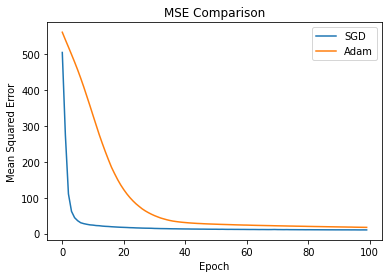

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['mean_squared_error'],label ='SGD')
plt.plot(history2.history['mean_squared_error'],label = 'Adam')
plt.title('MSE Comparison')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

พบว่า SGD optimizer และ Adam optimizer มี mean squared error ใกล้เคียงกันเมื่อ epoch มากกว่า 50 ครั้ง อย่างไรก็ตาม SGD จะมี error ลู่เข้าใกล้ 0 เร็วกว่า Adam และมี error ที่น้อยกว่า Adam อยู่จำนวนหนึ่งเสมอ